In [1]:
# Importing the different libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
# Reading in the Dataset
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
mels = pd.read_csv("melb_data.csv")
# Printing the first five rows of the dataset
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
# We rename the [US dollar ] and Period\Unit: columns to something easier to type like US_dollar and Time.
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar','Period\\Unit:': 'Time'},inplace=True)
# Changing the Time column to a datetime data type.
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
# Sorting the values by Time in ascending order.
exchange_rates.sort_values('Time', inplace=True)
# Reseting the index (and drop the initial index).
exchange_rates.reset_index(drop=True, inplace=True)
# Printing the first five rows
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [4]:
# Isolating the Time and the US_dollar columns, we do this since our main focus in this project is on the rate between the Euro and the US dollar
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
# Checking the US_dollar column first 5 rows
print(euro_to_dollar.loc[:,"US_dollar"].value_counts().head())
print("\n")
# Checking the US_dollar columns last 5 rows
print(euro_to_dollar.loc[:,"US_dollar"].value_counts().tail())
print("\n")
# Exploring the new dataframe
euro_to_dollar.info()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
Name: US_dollar, dtype: int64


1.0311    1
1.4727    1
1.0534    1
1.1210    1
1.2151    1
Name: US_dollar, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5699 non-null   datetime64[ns]
 1   US_dollar  5699 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 89.2+ KB


In [5]:
# Removing "-" from the US_dollar column
euro_to_dollar = euro_to_dollar.loc[euro_to_dollar.loc[:,"US_dollar"] != "-"]
# Chagning the US_dollar from an object datatype to float64 datatype
euro_to_dollar.loc[:,"US_dollar"] = euro_to_dollar.loc[:,"US_dollar"].astype(float)
# Exploring our dataframe
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Bar Graph

AttributeError: 'Text' object has no property 'suze'

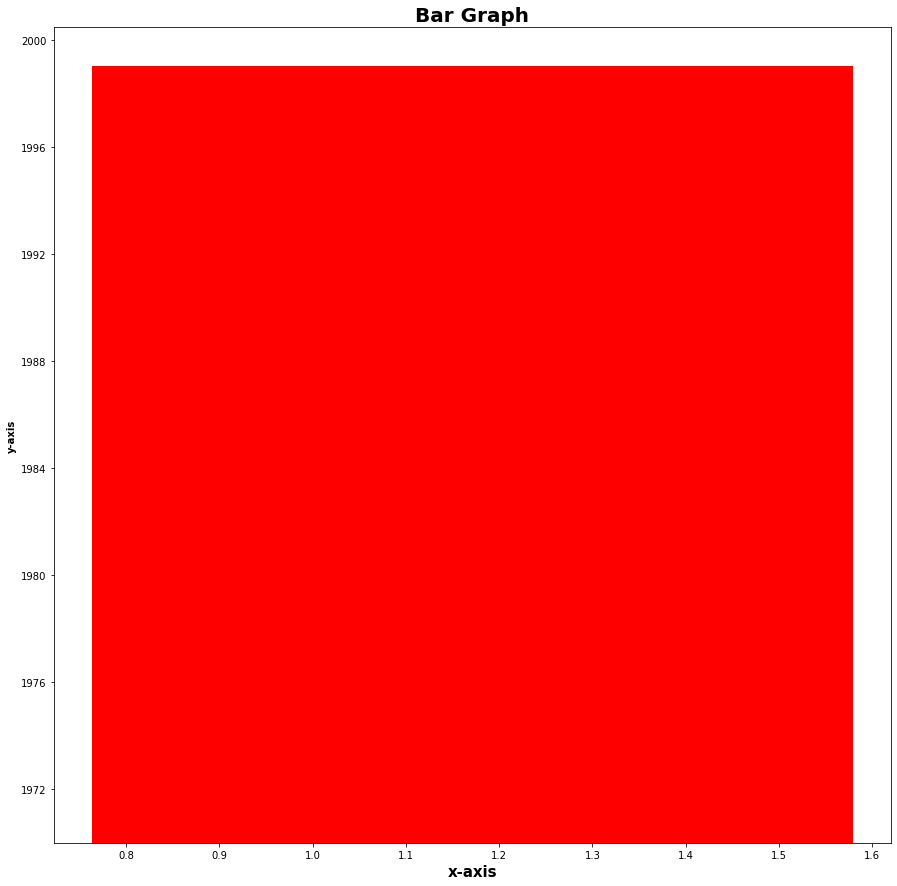

In [6]:
def bar_graph(data_set, xpoint, coordinates_vertical, width, height, marker_color , title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (width, height))
    ax.bar(data_set.loc[:,xpoint].head(), data_set.loc[:,coordinates_vertical].head(), color = marker_color)
    ax.set_title(title, fontweight = "bold", size = 20)
    ax.set_xlabel(xlabel,fontweight = "bold", size = 15)
    ax.set_ylabel(ylabel, fontweight = "bold",suze = 15)
    plt.show()
    return None
bar_graph(euro_to_dollar,"US_dollar", "Time", 15, 15, "red", "Bar Graph", "x-axis", "y-axis")

## Grid Charts

In [ ]:
def grid_chart(width, height, amount_of_rows, amount_of_columns, data_set, xpoints_1, ypoints_1):
    list_for_other_graphs = []
    product = (amount_of_rows * amount_of_columns) + 1
    for i in range(product):
        list_for_other_graphs.append(i)
    if 0 in list_for_other_graphs or 1 in list_for_other_graphs:
        list_for_other_graphs.remove(0)
        list_for_other_graphs.remove(1)
    plt.figure(figsize=(9,6))
    plt.subplot(amount_of_rows,amount_of_columns,1,)
    plt.plot(data_set.loc[:,xpoints_1],data_set.loc[:,ypoints_1])
    for each_plot in list_for_other_graphs:
        plt.subplot(3,2,each_plot)
        plt.plot(data_set.loc[:,xpoints_1],data_set.loc[:,ypoints_1])
    return None
grid_chart(9, 6, 3, 2 ,euro_to_dollar, "Time", "US_dollar")


## Line Graph

In [ ]:
def line_graph(data_set, xpoints, ypoints, width, height, marker_color, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (width,height))
    ax.plot(data_set.loc[:,xpoints],data_set.loc[:,ypoints], color = marker_color)
    ax.set_title(title, fontweight = "bold", size = 20)
    ax.set_xlabel(xlabel, fontweight = "bold", size = 15)
    ax.set_ylabel(ylabel, fontweight = "bold", size = 15)
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
    plt.show()
    return None
line_graph(euro_to_dollar,"Time","US_dollar",15,10,"red","DeltaHacks","x-axis","y-axis")

## Scatter Plot

In [ ]:
def scatter_plot(data_set,xpoints,ypoints,width,height, marker_color, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (width,height))
    ax.scatter(data_set.loc[:,xpoints],data_set.loc[:,ypoints], color = marker_color)
    ax.set_title(title, fontweight = "bold" , size = 20)
    ax.set_xlabel(xlabel, fontweight = "bold", size = 15)
    ax.set_ylabel(ylabel, fontweight = "bold", size = 15)
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
    plt.show()
    return None
scatter_plot(euro_to_dollar,"Time","US_dollar",15,10,"red","DeltaHacks","x-axis","y-axis")

In [ ]:
data_set.loc[:,"Title"].

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
def pie_chart(data_set,xpoints,ypoints, title):
    unique_x_values = data_set.loc[:,xpoints].unique()
    sum_of_y_unique_x_values = []
    for each_value in unique_x_values:
        data_frame = data_set.loc[data_set.loc[:,xpoints] == each_value]
        sum_of_y_unique_x_values.append(data_frame.loc[:,ypoints].sum())
    fig, ax = plt.subplots()
    ax.pie(sum_of_y_unique_x_values, labels = unique_x_values, autopct='%1.1f%%',
           shadow = True, startangle = 90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    return None
pie_chart(mels,"Regionname",'Car', "Pie Chart")

In [ ]:
mels.head()

In [ ]:
unique_names = df.loc[:,"Name"].unique()
unique_names

In [ ]:
empty_list = []
for i in unique_names:
    pf = df.loc[df.loc[:,"Name"] == i]
    empty_list.append(pf.loc[:,"Age"].sum())
print(empty_list)